In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import math
import numpy as np

params = {
    'legend.fontsize': 16,
    'legend.handlelength': 3,
    'legend.loc': 'upper center',
    'legend.markerscale': 1.5,
    'legend.edgecolor': 'black',
    'legend.borderaxespad': 0,
    'font.size': 20,
    'font.family': 'DeJavu Serif',
    'font.serif': ['Times New Roman'],
    'xtick.labelsize':'small',
    'ytick.labelsize':'small',
    'lines.markersize': 15,
    'axes.linewidth': 1.8
}
plt.rcParams.update(params)

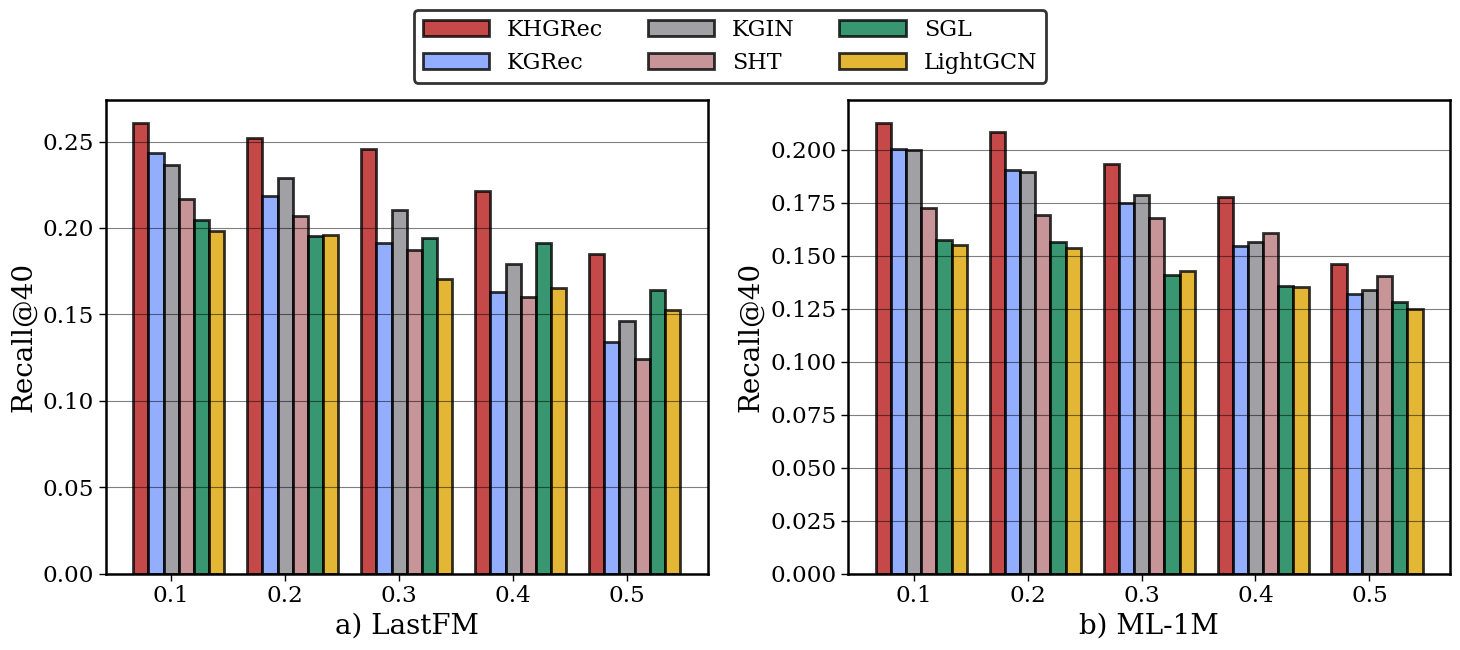

In [13]:
colors = [ "#dea404", "#067d4d", "#BA797D", "#88898f", "#789aff", "#b71c1c"] # "#6a1a3d",  "#ff8c00" , "#284cbd", "#9816b5",

data_recall_lastfm = {
    '0.1': {'LightGCN': 0.19832, 'SGL': 0.20442,  'SHT': 0.21648, 'KGIN': 0.2366777, 'KGRec': 0.2431865, 'KHGRec': 0.26099},
    '0.2': {'LightGCN': 0.19589, 'SGL': 0.19551,  'SHT': 0.20697, 'KGIN': 0.2289055, 'KGRec': 0.218605, 'KHGRec': 0.25222},
    '0.3': {'LightGCN': 0.17055, 'SGL': 0.19442,  'SHT': 0.18752,  'KGIN': 0.2104168,  'KGRec': 0.191573, 'KHGRec': 0.24547},
    '0.4': {'LightGCN': 0.16531, 'SGL': 0.19137,  'SHT': 0.16011, 'KGIN': 0.1791416,  'KGRec': 0.162998, 'KHGRec': 0.22128},
    '0.5': {'LightGCN': 0.15245, 'SGL': 0.16431,  'SHT': 0.12403, 'KGIN': 0.1463172,  'KGRec': 0.1338, 'KHGRec': 0.18504},
}

data_recall_ndcg = {
    '0.1': {'LightGCN': 0.15499, 'SGL': 0.15748,  'SHT': 0.17235, 'KGIN': 0.1999962,'KGRec':0.2004268, 'KHGRec': 0.2129},
    '0.2': {'LightGCN': 0.15369, 'SGL': 0.15676,  'SHT': 0.16935, 'KGIN': 0.1896115,  'KGRec': 0.1906257, 'KHGRec': 0.20822},
    '0.3': {'LightGCN': 0.14293, 'SGL': 0.14109,  'SHT': 0.16795, 'KGIN': 0.1786528,  'KGRec': 0.1747835, 'KHGRec': 0.19337},
    '0.4': {'LightGCN': 0.13528, 'SGL': 0.13561,  'SHT': 0.16069, 'KGIN': 0.1565005,  'KGRec': 0.15448, 'KHGRec': 0.17791},
    '0.5': {'LightGCN': 0.1251, 'SGL': 0.12844,  'SHT': 0.14058, 'KGIN': 0.1339848,  'KGRec': 0.1322102, 'KHGRec': 0.14615},
}

labels = list(data_recall_lastfm.keys())
models = ['LightGCN', 'SGL', 'SHT', 'KGIN', 'KGRec', 'KHGRec']
num_models = len(models)

x = np.arange(len(labels))  # the label locations
width = 0.8 / num_models  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 6)

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_recall_lastfm[label][model] for label in labels]
    # if k == 9:
    #   rects = ax1.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=1, align='edge', linewidth=2)
    # else:
    rects = ax1.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=0.8, align='edge', linewidth=2)

ax1.set_ylabel('Recall@40')
ax1.set_xlabel('a) LastFM')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Add bars for each model for each dataset
for i in range(num_models):
    k = num_models - i -1
    model = models[k]
    model_data = [data_recall_ndcg[label][model] for label in labels]
    # if k == 6:
    #   rects = ax2.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=1, align='edge', linewidth=2)
    # else:
    rects = ax2.bar(x - 0.4 + width/2 + i*width, model_data, width, label=model, color=colors[k], edgecolor='black', alpha=0.8, align='edge', linewidth=2)

ax2.set_ylabel('Recall@40')
ax2.set_xlabel('b) ML-1M')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)

# Add grid
ax1.grid(axis='y', linewidth=0.8, alpha=0.3)
ax2.grid(axis='y', linewidth=0.8, alpha=0.3)

# Add legend to the bottom of the figure
handles, labels = ax1.get_legend_handles_labels()
legend = fig.legend(handles, labels,  loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, edgecolor='black')

# Add border to the legend
legend.get_frame().set_linewidth(2)

ax1.tick_params(direction='out', length=5, width=1, colors='black', grid_color='black', grid_alpha=0.5)
ax2.tick_params(direction='out', length=5, width=1, colors='black', grid_color='black', grid_alpha=0.5)


ax1.grid( which='minor', color='black', linestyle='dashed', alpha=0.1)
ax2.grid( which='minor', color='black', linestyle='dashed', alpha=0.1)
fig.tight_layout()

plt.show()


In [14]:
fig.savefig("noise_resistance.pdf", format="pdf", bbox_inches="tight")